<a href="https://colab.research.google.com/github/Neil-Kloper/ODSC-Competition/blob/master/ODSC_FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ODSC Hackathon Submission, Featuring FastAI Tabular models

Video description: https://www.youtube.com/watch?v=ILvwgQv2p4k

First I will begin by reading in the data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
odsc_train = pd.read_csv('/content/drive/My Drive/ODSC comp/train_set.csv')
solutions = pd.read_csv('/content/drive/My Drive/ODSC comp/test_solutions (1).csv')
odsc_test = pd.read_csv('/content/drive/My Drive/ODSC comp/test_set (1).csv')
odsc_train.drop('profile_id', axis=1, inplace=True)

In [3]:
test_cols = list(odsc_test.columns)
train_cols = list(odsc_train.columns)
y_cols = list(solutions.columns)
# Profile ID is the columns thats exclusive to the training set

In [ ]:
# to experiment with, results weren't all that great.

# from itertools import combinations
# for combo in combinations(test_cols, 2):
#   odsc_train[combo[0]+'_'+combo[1]] = odsc_train[combo[0]] * odsc_train[combo[1]]
#   odsc_test[combo[0]+'_'+combo[1]] = odsc_test[combo[0]] * odsc_test[combo[1]]
# print(odsc_train.shape, odsc_test.shape)

# test_cols = list(odsc_test.columns)
# train_cols = list(odsc_train.columns)
# y_cols = list(solutions.columns)

### Next, I will load the data into a databunch object, and lebel the appropriate columns for the models

In [4]:
from fastai.tabular import *

cat_names = []
cont_names = test_cols

dep_var = y_cols
procs = [FillMissing, Categorify, Normalize]

FillMissing.FillStrategy='MEAN'

PATH = Path('/content/drive/My Drive/ODSC comp/')

test = TabularList.from_df(odsc_test[test_cols], path=PATH, cat_names=cat_names, cont_names=cont_names)

for col in train_cols:
  odsc_train[col] = odsc_train[col].astype(float)

In [5]:
data = (TabularList.from_df(odsc_train[train_cols],path=PATH,
                            cat_names=[], 
                            cont_names=test_cols,
                            procs=procs)
                           .split_by_rand_pct(valid_pct=0.2)
                          #  .split_by_idx(valid_idx = range(len(odsc_train)-100000, len(odsc_train)))
                           .label_from_df(cols = y_cols, label_cls = FloatList)
                           .add_test(test)
                           .databunch())

In [ ]:
data.show_batch(rows=3)

ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,target
1.5977,0.5735,2.1817,-0.6755,0.4723,-1.9241,-1.7003,-1.7523,[1.753744 1.685668 1.391261 1.885541]
-1.0728,-1.0718,0.2906,-1.2618,-1.2107,-0.1756,1.0151,-0.2041,[ 1.250836 0.676842 -0.030785 1.004012]
0.8950,1.6935,-0.0484,-0.4245,-0.7751,0.3915,0.8117,0.5027,[1.103046 1.685879 1.941016 1.261607]


### Model creation and training

Below I have the code used to create a veriety of different models. I expiremented with different architectures, learning rates, and epochs. the goal was to create a diverse and useful set of models.

In [ ]:
learn = tabular_learner(data, layers=[1000 ,800, 600, 400, 200, 100, 16], emb_drop=0.2, metrics=[mae, rmse],callback_fns=ShowGraph)

epoch,train_loss,valid_loss,mean_absolute_error,root_mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


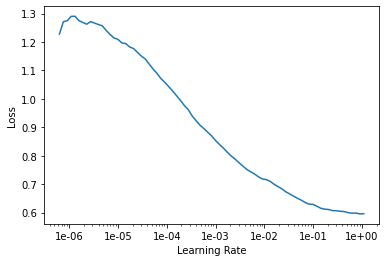

In [ ]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,mean_absolute_error,root_mean_squared_error,time
0,0.193817,0.161966,0.285658,0.398962,02:03
1,0.138917,0.141760,0.265035,0.373076,02:03
2,0.126092,0.109105,0.219407,0.326213,02:03


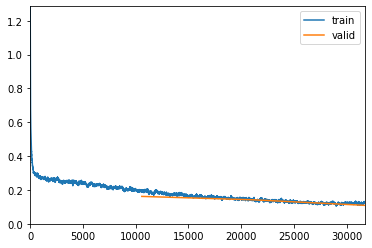

epoch,train_loss,valid_loss,mean_absolute_error,root_mean_squared_error,time
0,0.114347,0.104674,0.217212,0.319799,02:03
1,0.120164,0.117421,0.224879,0.337848,02:02
2,0.109069,0.119517,0.219974,0.340168,02:02


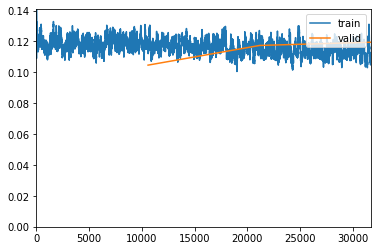

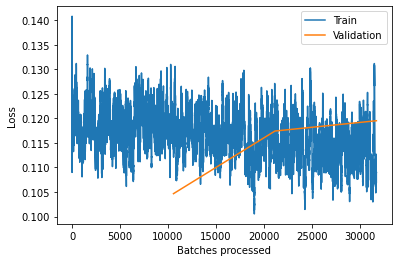

In [ ]:
learn = tabular_learner(data, layers=[1000 ,800, 600, 400, 200, 100, 16], emb_drop=0.2, metrics=[mae, rmse],callback_fns=ShowGraph)

learn.fit_one_cycle(3, max_lr=slice(1e-03))
learn.fit_one_cycle(3, max_lr=slice(5e-05))
learn.model
learn.recorder.plot_losses()
learn.load('ODSC-checkpoint-6')
# Model_Path = Path('/content/drive/My Drive')
# learn.model_dir = Model_Path
# learn.load('ODSC-checkpoint-6');

In [ ]:
### MAE:  0.3405068749729891
### Overal RMSE:  0.4509225178553229


learn = tabular_learner(data, layers=[1000 ,250, 250, 125, 125, 25, 25], emb_drop=0.2, metrics=mae)
# learn.fit_one_cycle(3, max_lr=slice(1e-03))

Model_Path = Path('/content/drive/My Drive')
learn.model_dir = Model_Path
learn.load('ODSC-checkpoint-4');

In [ ]:
### MAE:  0.35305798672580796
### Overal RMSE:  0.5317789645538487

# learn = tabular_learner(data, layers=[1280, 320, 80, 20], emb_drop=0.2, metrics=mae)

# learn.fit_one_cycle(4, max_lr=slice(1e-03))

# Model_Path = Path('/content/drive/My Drive')
# learn.model_dir = Model_Path
# learn.load('ODSC-checkpoint-3');

In [12]:
### MAE:  0.34296352864942475
### RMSE: 0.46369192719119134

learn = tabular_learner(data, layers=[1000 ,250, 250, 125, 25], emb_drop=0.2, metrics=mae)
# learn.fit_one_cycle(2, max_lr=slice(1e-03))


Model_Path = Path('/content/drive/My Drive')
learn.model_dir = Model_Path
learn.load('ODSC-checkpoint-2');



In [ ]:
### MAE:  0.3504803743939919
### Overal RMSE:  0.5317789645538487
# * MAE of  pm :  0.39547030833910907
# * MAE of  stator_tooth :  0.3412957371012223
# * MAE of  stator_yoke :  0.25109873452987186
# * MAE of  stator_winding :  0.41405671760576357

# learn = tabular_learner(data, layers=[1000 ,500, 250, 250, 125, 125, 25], metrics=mae, emb_drop=0.1, callback_fns=ShowGraph)
# learn.fit_one_cycle(12, max_lr=slice(1e-03))
# learn.model
# learn.recorder.plot_losses()

# Model_Path = Path('/content/drive/My Drive')
# learn.model_dir = Model_Path
# learn.save('ODSC-checkpoint-5');
# learn.load('ODSC-checkpoint-5');

# Evaluation on test data

The cell below is set up to test out individual models to see how they perform and where they could improve.

In [13]:
from sklearn.metrics import mean_squared_error
import math

preds = learn.get_preds(ds_type=DatasetType.Test)

submission_preds = pd.DataFrame(preds[0][:,:].numpy(), columns=y_cols)

print('* Overal RMSE: ', math.sqrt(mean_squared_error(submission_preds, solutions)))
print('* RMSE of ', y_cols[0], ': ',  math.sqrt(mean_squared_error(submission_preds[y_cols[0]], solutions[y_cols[0]])))
print('* RMSE of ', y_cols[1], ': ',  math.sqrt(mean_squared_error(submission_preds[y_cols[1]], solutions[y_cols[1]])))
print('* RMSE of ', y_cols[2], ': ',  math.sqrt(mean_squared_error(submission_preds[y_cols[2]], solutions[y_cols[2]])))
print('* RMSE of ', y_cols[3], ': ',  math.sqrt(mean_squared_error(submission_preds[y_cols[3]], solutions[y_cols[3]])))

* Overal RMSE:  0.4785527186688116
* RMSE of  pm :  0.5793460836903713
* RMSE of  stator_tooth :  0.4466858823579699
* RMSE of  stator_yoke :  0.3379857421156511
* RMSE of  stator_winding :  0.5163780534864765


In [14]:
# Below for comparison is the of a model that always gueses the mean value.
submission_preds[:] = np.zeros(submission_preds.shape)
print('* Overal MAE: ', mean_squared_error(submission_preds, solutions))
print('* Overal RMSE: ', math.sqrt(mean_squared_error(submission_preds, solutions)))
print('* RMSE of ', y_cols[0], ': ',  math.sqrt(mean_squared_error(submission_preds[y_cols[0]], solutions[y_cols[0]])))
print('* RMSE of ', y_cols[1], ': ',  math.sqrt(mean_squared_error(submission_preds[y_cols[1]], solutions[y_cols[1]])))
print('* RMSE of ', y_cols[2], ': ',  math.sqrt(mean_squared_error(submission_preds[y_cols[2]], solutions[y_cols[2]])))
print('* RMSE of ', y_cols[3], ': ',  math.sqrt(mean_squared_error(submission_preds[y_cols[3]], solutions[y_cols[3]])))

* Overal MAE:  0.8365248340181628
* Overal RMSE:  0.9146173156124712
* RMSE of  pm :  0.977403021277897
* RMSE of  stator_tooth :  0.8673116394075276
* RMSE of  stator_yoke :  0.8076073251722856
* RMSE of  stator_winding :  0.993138257517928


# A Blended model aproach

The code below is used to blend multiple different models results into one submission.

In [6]:
# Load the models to blend the score:
Model_Path = Path('/content/drive/My Drive')

learn_6 = tabular_learner(data, layers=[1000 ,800, 600, 400, 200, 100, 16], emb_drop=0.2, metrics=[mae, rmse],callback_fns=ShowGraph)
learn_6.model_dir = Model_Path
learn_6.load('ODSC-checkpoint-6')

learn_5 = tabular_learner(data, layers=[1000 ,500, 250, 250, 125, 125, 25], metrics=mae, emb_drop=0.1, callback_fns=ShowGraph)
learn_5.model_dir = Model_Path
learn_5.load('ODSC-checkpoint-5')

learn_4 = tabular_learner(data, layers=[1000 ,250, 250, 125, 125, 25, 25], emb_drop=0.2, metrics=mae)
learn_4.model_dir = Model_Path
learn_4.load('ODSC-checkpoint-4')

learn_3 = tabular_learner(data, layers=[1280, 320, 80, 20], emb_drop=0.2, metrics=mae)
learn_3.model_dir = Model_Path
learn_3.load('ODSC-checkpoint-3')

learn_2 = tabular_learner(data, layers=[1000 ,250, 250, 125, 25], emb_drop=0.2, metrics=mae)
learn_2.model_dir = Model_Path
learn_2.load('ODSC-checkpoint-2');

In [9]:
preds_6 = learn_6.get_preds(ds_type=DatasetType.Test)
preds_5 = learn_5.get_preds(ds_type=DatasetType.Test)
preds_4 = learn_4.get_preds(ds_type=DatasetType.Test)
preds_3 = learn_3.get_preds(ds_type=DatasetType.Test)
preds_2 = learn_2.get_preds(ds_type=DatasetType.Test)

In [18]:
# Below for comparison is the of a model that always gueses the mean value.
preds_mean = (np.array(preds_4[0]) +  np.array(preds_2[0]) + np.array(preds_5[0]) + np.array(preds_3[0]))/4.
preds_mean = pd.DataFrame(preds_mean, columns=y_cols)
print('* Overal RMSE: ', math.sqrt(mean_squared_error(preds_mean, solutions)))
print('* RMSE of ', y_cols[0], ': ',  math.sqrt(mean_squared_error(preds_mean[y_cols[0]], solutions[y_cols[0]])))
print('* RMSE of ', y_cols[1], ': ',  math.sqrt(mean_squared_error(preds_mean[y_cols[1]], solutions[y_cols[1]])))
print('* RMSE of ', y_cols[2], ': ',  math.sqrt(mean_squared_error(preds_mean[y_cols[2]], solutions[y_cols[2]])))
print('* RMSE of ', y_cols[3], ': ',  math.sqrt(mean_squared_error(preds_mean[y_cols[3]], solutions[y_cols[3]])))
print('* Overal Mean Absolute Error: ', mean_squared_error(preds_mean, solutions))

* Overal RMSE:  0.46787087842874925
* RMSE of  pm :  0.5655782793556233
* RMSE of  stator_tooth :  0.43521253814372535
* RMSE of  stator_yoke :  0.3251881871060305
* RMSE of  stator_winding :  0.5104669774403504
* Overal Mean Absolute Error:  0.21890315888168946


In [20]:
preds_mean.to_csv('/content/drive/My Drive/predicted_temperatures.csv')

# Conclusion:
By taking the average of multiple decently performing models we were not able to improve the root mean squared error. The blend resulted in an RMSE score of around .47, where the best individual model in the blend could achieve a score of .45. *However*, the mean absolute error of the blend (average distance the prediction has from the actual value) went from a score of .35 for indiviual models down to .21
  To put that into perspective. if a model only guessed the mean value for each entry, it would score .91 for RMSE and .83 for MAE